## data structure && basic function

In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
class LineSegment:
    def __init__(self, midpoint=None, slope=None, left_endpoint=None, right_endpoint=None):
        if midpoint is not None and slope is not None:
            self.midpoint = midpoint
            self.slope = slope
            self.calculate_endpoints()
            self.calculate_length()
        elif left_endpoint is not None and slope is not None:
            self.endpoint1 = left_endpoint
            self.slope = slope
            self.calculate_midpoint_and_right_endpoint()
            self.calculate_length()
        elif right_endpoint is not None and slope is not None:
            self.endpoint2 = right_endpoint
            self.slope = slope
            self.calculate_midpoint_and_left_endpoint()
            self.calculate_length()
        else:
            raise ValueError("Invalid arguments. Please provide either midpoint and slope, left_endpoint and slope, or right_endpoint and slope.")

    def calculate_endpoints(self):
        x_mid, y_mid = self.midpoint
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x1 = x_mid - delta_x
        y1 = y_mid - self.slope * delta_x
        x2 = x_mid + delta_x
        y2 = y_mid + self.slope * delta_x

        self.endpoint1 = (x1, y1)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_right_endpoint(self):
        x1, y1 = self.endpoint1
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x1 + delta_x
        y_mid = y1 + self.slope * delta_x
        x2 = x1 + 2 * delta_x
        y2 = y1 + 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint2 = (x2, y2)

    def calculate_midpoint_and_left_endpoint(self):
        x2, y2 = self.endpoint2
        delta_x = 0.5 / ((1 + self.slope**2)**0.5)
        x_mid = x2 - delta_x
        y_mid = y2 - self.slope * delta_x
        x1 = x2 - 2 * delta_x
        y1 = y2 - 2 * self.slope * delta_x

        self.midpoint = (x_mid, y_mid)
        self.endpoint1 = (x1, y1)

    def calculate_length(self):
        length = ((self.endpoint2[0] - self.endpoint1[0])**2 +
                  (self.endpoint2[1] - self.endpoint1[1])**2)**0.5
        self.length = length

    def get_endpoints(self):
        return self.endpoint1, self.endpoint2

    def get_midpoint(self):
        return self.midpoint

    def get_slope(self):
        return self.slope
    
    def intercept(self):
        return self.midpoint[1] - self.slope * self.midpoint[0]


In [91]:
def plot_line_segments(line_segments, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()

    for line_segment in line_segments:
        endpoints = line_segment.get_endpoints()
        x_values = [endpoints[0][0], endpoints[1][0]]
        y_values = [endpoints[0][1], endpoints[1][1]]

        #ax.plot(x_values, y_values , marker='o',linestyle='-', label=f'Slope: {line_segment.get_slope()}')
        ax.plot(x_values, y_values , linestyle='-', label=f'Slope: {line_segment.get_slope()}')

    if fig is None or ax is None:
        plt.show()

    return fig, ax


def print_line_segments(line_segments_array):
    for idx, line_segment in enumerate(line_segments_array, start=1):
        print(f"Line {idx} - Midpoint: {line_segment.get_midpoint()}")
        print(f"Line {idx} - Endpoints: {line_segment.get_endpoints()}")
        print(f"Line {idx} - Slope: {line_segment.get_slope()}")
        print(f"Line {idx} - intercept: {line_segment.intercept()}")


def lineplot(p1, p2, label=None, color='b'):
    endpoints = (p1, p2)
    x_values = [endpoints[0][0], endpoints[1][0]]
    y_values = [endpoints[0][1], endpoints[1][1]]
    ax.plot(x_values, y_values, linestyle='-', label=label, color=color)



### update

In [92]:
def updateLeft(line_segments_array, index, slope):
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]

    right_endpoint = existing_line.get_endpoints()[0]

    new_line = LineSegment(right_endpoint=right_endpoint, slope=slope)

    line_segments_array.insert(index + 1, new_line)

def updateRight(line_segments_array, index, slope):
    if index < 0 or index >= len(line_segments_array):
        print("Invalid index.")
        return

    existing_line = line_segments_array[index]
    
    left_endpoint = existing_line.get_endpoints()[1]

    new_line = LineSegment(left_endpoint=left_endpoint, slope=slope)

    line_segments_array.insert(index + 1, new_line)

### reflect

In [93]:
def reflect_slope(k1,k):
    return ((k*k-1)+2*k/k1)/(2*k-(k*k-1)/k1)



def reflect_simple(index, line_segments_array, tag, k1=None, color='b'):

    if k1 is None:
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1 / 180)

    # incident_light
    p1 = line_segments_array[index].get_midpoint()
    p2 = (-p1[1] / k1 + p1[0], 25)
    lineplot(p1, p2, label=f'Slope: {line_segments_array[index].get_slope()}', color=color)

    # reflect_light
    slope = reflect_slope(k1, line_segments_array[index].get_slope())
    line = LineSegment(left_endpoint=line_segments_array[index].get_endpoints()[tag], slope=slope)
    p3 = (0, line.intercept())
    # print(line.intercept())
    if  line.intercept() > -300 and line.intercept() < 0:
        lineplot(p1, p3, label=f'Slope: {line_segments_array[index].get_slope()}', color=color)



def degree_incident_light_is(d):
    

    # current_color = plt.gca()._get_lines.get_next_color()
    # reflect_simple(0, line_segments_arrayR, 1, d, current_color)
    # reflect_simple(0, line_segments_arrayL, 0, d, current_color)

    # current_color = plt.gca()._get_lines.get_next_color()
    # reflect_simple(15, line_segments_arrayR, 1, d, current_color)
    # reflect_simple(15, line_segments_arrayL, 0, d, current_color)


    for i in range(0, 10):
        current_color = plt.gca()._get_lines.get_next_color()
        reflect_simple(30 * i, line_segments_arrayR, 1, d, current_color)

    for i in range(0, 10):
        current_color = plt.gca()._get_lines.get_next_color()
        reflect_simple(30 * i, line_segments_arrayL, 0, d, current_color)
    


## circle

In [94]:
def draw_circle(fig=None, ax=None):

    radius = 300
    center = (0, 0)
    theta = np.linspace(np.pi, 2 * np.pi, 1000)  
    circle_x = radius * np.cos(theta) + center[0]
    circle_y = radius * np.sin(theta) + center[1]

    incident_angle = np.linspace(0, 2 * np.pi, 30)
    reflection_interval = [-np.pi/9, np.pi/9]

    ax.plot(circle_x, circle_y, label='Circle')

def circle_slope(index):
    k_value =  np.tan(index/300+1/600)
    return k_value


def find_line_segments_fit_circle(line_segments_arrayR,line_segments_arrayL):

    left_endpoint1 = (0, -300)
    slope1 = - circle_slope(0)
    line1 = LineSegment(right_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = - circle_slope(i)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)


    right_endpoint1 = (0, -300)
    slope1 = circle_slope(0)
    line1 = LineSegment(left_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    
    for i in range(1, 300):
        index_to_insert = i-1
        slope_to_insert = circle_slope(i)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)

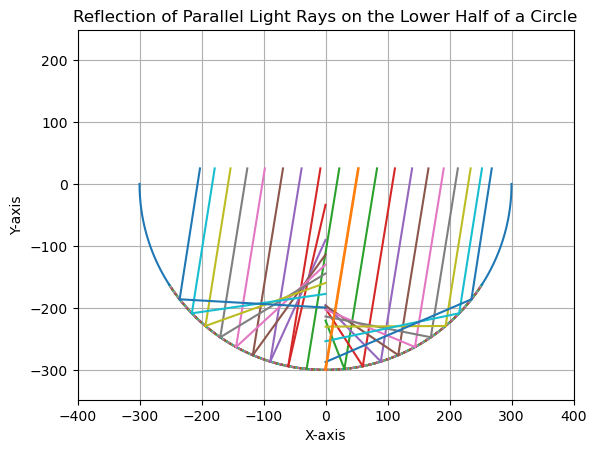

In [95]:
# circle
fig, ax = plt.subplots()


# draw a circle 
draw_circle(fig, ax)


# draw a bunch of  line segments to fit the circle 
line_segments_arrayR = []
line_segments_arrayL = []

find_line_segments_fit_circle(line_segments_arrayR,line_segments_arrayL)
    
# print_line_segments(line_segments_arrayR)
# print("###########################################################")
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(80)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

plt.title('Reflection of Parallel Light Rays on the Lower Half of a Circle')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.savefig('my_plot.pdf', format='pdf')
plt.show()



## center to edge parabola

In [96]:
def parabola_slope(index, line_segments_array, y, tag, k1 = None):

    existing_line = line_segments_array[index-1]

    endpoint = existing_line.get_endpoints()[tag] # r1 l0
    x0 = endpoint[0]
    y0 = endpoint[1]
    #y = -160
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #print(endpoint)
    k2 = (y0 - y)/x0
    b = (2 - 2/(k2*k1))/(1/k2 + 1/k1)
    last_k = existing_line.get_slope()
    k_value = (b + (b * b + 4) ** 0.5) / 2
    dK = last_k - k_value
    if (dK > 1 or dK < -1 ):
        k_value = (b - (b * b + 4) ** 0.5) / 2
    return k_value


    


def small_theta(dy, k1 = None): 
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    theta=(-(4*dy+1/k1)+((4*dy+1/k1)**2+4*(1+2*dy/k1)*(4.5+4*dy/k1))**0.5)/(2*(-4.5-4*dy/k1))
    #o=np.atan(0.0856964)
    return np.tan(theta)





def find_line_segments_like_parabola(line_segments_arrayR, line_segments_arrayL, y, bottom, degree = None):
    dy = y-bottom
    left_endpoint1 = (0, -300)
    right_endpoint1 = (0, -300)

    slope1 = small_theta(dy, degree)
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    # print(line1.get_slope())
    
    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayL, y, 0, degree)
        # print(slope_to_insert)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)

    # print("###########################################################")


    slope1 = small_theta(dy, degree)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    # print(line1.get_slope())

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayR, y, 1, degree)
        # print(slope_to_insert)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)




In [97]:
print(small_theta(140, 70))

-0.17431301600192156


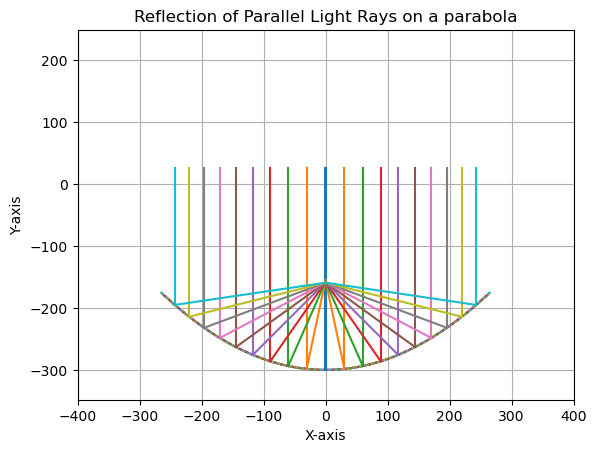

In [98]:
#center to edge parabola

fig, ax = plt.subplots()


# draw a bunch of  line segments like parabola, and the degree of incident light is None(90) or 80
line_segments_arrayR = []
line_segments_arrayL = []
find_line_segments_like_parabola(line_segments_arrayR, line_segments_arrayL, -160, -300, None)
    
# print_line_segments(line_segments_arrayR)
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(None)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

# # set the range
# plt.xlim(-25, 25)
# plt.ylim(-310, -250)
# plt.xlim(-1, 6)
# plt.ylim(-303, -295)

plt.title('Reflection of Parallel Light Rays on a parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.savefig('my_plot.pdf', format='pdf')
plt.show()


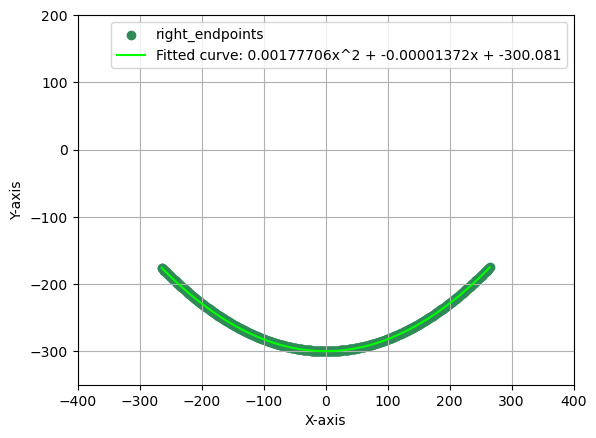

拟合曲线方程: 0.00177706x^2 + -0.00001372x + -300.081


In [99]:
tag = 1 

points_array = []
x = []
y = []
for i in range(300):
    points_array.append(line_segments_arrayL[i].get_endpoints()[tag])
    points_array.append(line_segments_arrayR[i].get_endpoints()[tag])
for i in range(600):
    x.append(points_array[i][0])
    y.append(points_array[i][1])

degree = 2
coefficients = np.polyfit(x, y, degree)


x_fit = np.linspace(min(x), max(x), 100)
y_fit = np.polyval(coefficients, x_fit)



plt.scatter(x, y, color='seagreen',label='right_endpoints')
plt.plot(x_fit, y_fit, color='lime', label=f'Fitted curve: {coefficients[0]:.8f}x^2 + {coefficients[1]:.8f}x + {coefficients[2]:.3f}')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 200)

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')

#plt.legend()
plt.grid(True)
plt.savefig('my_plot.pdf', format='pdf')


plt.show()
equation = f'{coefficients[0]:.8f}x^2 + {coefficients[1]:.8f}x + {coefficients[2]:.3f}'
print(f'Fitted curve: {equation}')


## edge to center parabola

In [113]:
def egde_slope(endpoint, tag, k1 = None):
     # r0 l1
    x0 = endpoint[0]
    y0 = endpoint[1]
    y = -160
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #print(endpoint)
    k2 = (y0 - y)/x0
    b = (2 - 2/(k2*k1))/(1/k2 + 1/k1)
    last_k = existing_line.get_slope()
    k_value = (b + (b * b + 4) ** 0.5) / 2
    dK = last_k - k_value
    if (dK > 1 or dK < -1 ):
        k_value = (b - (b * b + 4) ** 0.5) / 2
    return k_value

def find_line_segments_like_parabola_ends(left_endpoint1, right_endpoint1, line_segments_arrayR, line_segments_arrayL, degree = None):


    # left_endpoint1 = (-width, height)
    # right_endpoint1 = (width, height)
    slope1 = -1
    # slope1 = egde_slope(left_endpoint1, 1, degree)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    # print(line1.get_slope())
    
    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayL, -160, 1, degree)
        # print(slope_to_insert)
        updateRight(line_segments_arrayL, index_to_insert, slope_to_insert)

    # print("###########################################################")

    slope1 = 1
    # slope1 = egde_slope(right_endpoint1, 0, degree)
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    # print(line1.get_slope())

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayR, -160, 0, degree)
        # print(slope_to_insert)
        updateLeft(line_segments_arrayR, index_to_insert, slope_to_insert)

Line 300 - Midpoint: (-247.7740307362299, -147.30244851305443)
Line 300 - Endpoints: ((-248.0858100388078, -146.91156020869624), (-247.46225143365194, -147.69333681741261))
Line 300 - Slope: -1.253733975046259
Line 300 - intercept: -457.94516898122185

Line 300 - Midpoint: (277.80029996735414, -205.87344560559526)
Line 300 - Endpoints: ((277.39210944908416, -206.1622024250723), (278.2084904856241, -205.58468878611822))
Line 300 - Slope: 0.7074069743238639
Line 300 - intercept: -402.391315271763

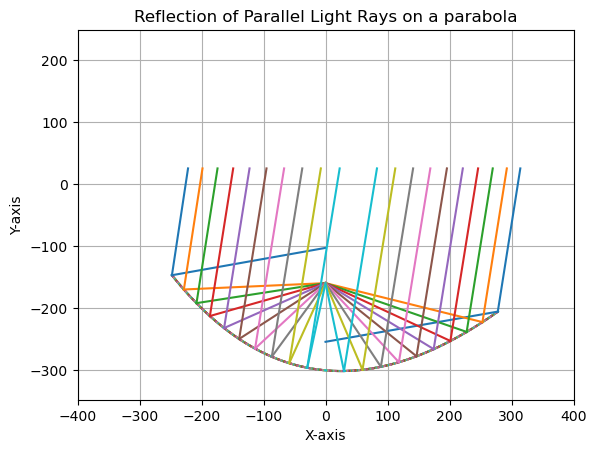

In [114]:
#edge to center parabola

fig, ax = plt.subplots()


# draw a bunch of  line segments like parabola, and the degree of incident light is None(90) or 80
line_segments_arrayR = []
line_segments_arrayL = []
left_endpoint1 = (-248.0858100388078, -146.91156020869624)
right_endpoint1 = (278.2084904856241, -205.58468878611822)
find_line_segments_like_parabola_ends(left_endpoint1, right_endpoint1, line_segments_arrayR, line_segments_arrayL, 80)
    
# print_line_segments(line_segments_arrayR)
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(80)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)


plt.title('Reflection of Parallel Light Rays on a parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.show()

## Reflected into an interval

In [115]:
def parabola_slope(index, line_segments_array, y, tag, k1 = None):

    existing_line = line_segments_array[index-1]

    endpoint = existing_line.get_endpoints()[tag] # r1 l0
    x0 = endpoint[0]
    y0 = endpoint[1]
    #y = -160
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    #print(endpoint)
    k2 = (y0 - y)/x0
    b = (2 - 2/(k2*k1))/(1/k2 + 1/k1)
    last_k = existing_line.get_slope()
    k_value = (b + (b * b + 4) ** 0.5) / 2
    dK = last_k - k_value
    if (dK > 1 or dK < -1 ):
        k_value = (b - (b * b + 4) ** 0.5) / 2
    return k_value


    


def small_theta(dy, k1 = None): 
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    theta=(-(4*dy+1/k1)+((4*dy+1/k1)**2+4*(1+2*dy/k1)*(4.5+4*dy/k1))**0.5)/(2*(-4.5-4*dy/k1))
    #o=np.atan(0.0856964)
    return np.tan(theta)





def find_line_segments_Reflected_into_an_interval(line_segments_arrayR, line_segments_arrayL, y1, y2, bottom, degree = None):
    dy = y1/2 + y2/2 -bottom
    left_endpoint1 = (0, -300)
    right_endpoint1 = (0, -300)

    slope1 = small_theta(dy, degree)
    line1 = LineSegment(right_endpoint=right_endpoint1, slope=slope1)
    line_segments_arrayL.append(line1)
    # print(line1.get_slope())

    y_values = np.linspace(y1, y2, 300)

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayL, y_values[i], 0, degree)
        # print(slope_to_insert)
        updateLeft(line_segments_arrayL, index_to_insert, slope_to_insert)

    # print("###########################################################")


    slope1 = small_theta(dy, degree)
    line1 = LineSegment(left_endpoint=left_endpoint1, slope=slope1)
    line_segments_arrayR.append(line1)
    # print(line1.get_slope())

    for i in range(1, 300):
        index_to_insert = i - 1
        slope_to_insert = parabola_slope(i, line_segments_arrayR, y_values[i], 1, degree)
        # print(slope_to_insert)
        updateRight(line_segments_arrayR, index_to_insert, slope_to_insert)




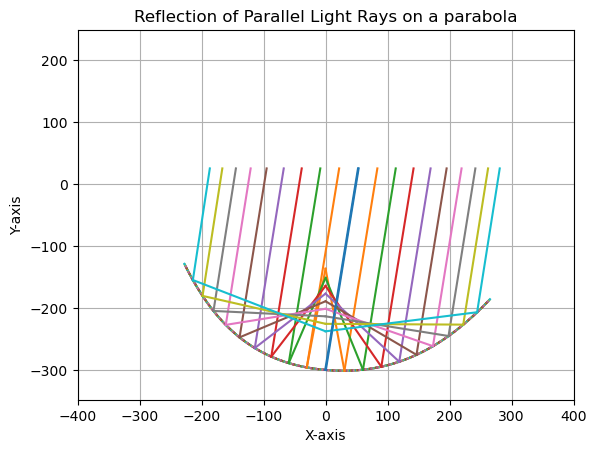

In [116]:
#center to edge parabola

fig, ax = plt.subplots()


# draw a bunch of  line segments like parabola, and the degree of incident light is None(90) or 80
line_segments_arrayR = []
line_segments_arrayL = []
find_line_segments_Reflected_into_an_interval(line_segments_arrayR, line_segments_arrayL, -130, -250, -300, 80)
    
# print_line_segments(line_segments_arrayR)
# print_line_segments(line_segments_arrayL)

plot_line_segments(line_segments_arrayR, fig, ax)
plot_line_segments(line_segments_arrayL, fig, ax)

degree_incident_light_is(80)

# set equal
plt.axis('equal')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 250)

# # set the range
# plt.xlim(-25, 25)
# plt.ylim(-310, -250)

# plt.xlim(-10, 10)
# plt.ylim(-310, -290)

plt.title('Reflection of Parallel Light Rays on a parabola')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.legend()
plt.grid(True)
plt.savefig('90-parabola-center_to_edge-full.pdf', format='pdf')
plt.show()

## Curve fitting

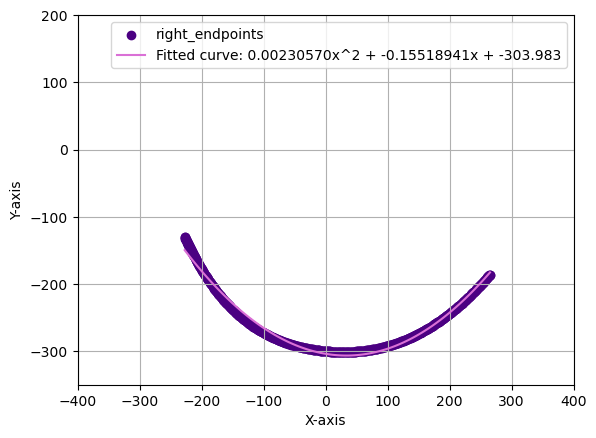

Fitted curve: 0.00230570x^2 + -0.15518941x + -303.983


In [117]:
tag = 1 

points_array = []
x = []
y = []
for i in range(300):
    points_array.append(line_segments_arrayL[i].get_endpoints()[tag])
    points_array.append(line_segments_arrayR[i].get_endpoints()[tag])
for i in range(600):
    x.append(points_array[i][0])
    y.append(points_array[i][1])

degree = 2
coefficients = np.polyfit(x, y, degree)


x_fit = np.linspace(min(x), max(x), 100)
y_fit = np.polyval(coefficients, x_fit)


#seagreen  lime

#indigo deeppink darkorchid
plt.scatter(x, y, color='indigo',label='right_endpoints')
plt.plot(x_fit, y_fit, color='orchid', label=f'Fitted curve: {coefficients[0]:.8f}x^2 + {coefficients[1]:.8f}x + {coefficients[2]:.3f}')

# set the range
plt.xlim(-400, 400)
plt.ylim(-350, 200)

plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('')

#plt.legend()
plt.grid(True)
plt.savefig('my_plot.pdf', format='pdf')


plt.show()
equation = f'{coefficients[0]:.8f}x^2 + {coefficients[1]:.8f}x + {coefficients[2]:.3f}'
print(f'Fitted curve: {equation}')


## Offset

## copy with data

### intercept_array

In [105]:
def find_intercepts(line_segments_arrayR, line_segments_arrayL, intercept_array,  k1 = None):
    if (k1 == None):
        k1 = float('inf')
    else:
        k1 = np.tan(np.pi * k1/180)
    for i in range(0,300):
        slope = reflect_slope(k1,line_segments_arrayL[i].get_slope())
        line = LineSegment(left_endpoint=line_segments_arrayL[i].get_midpoint(), slope=slope)
        intercept_array.append(line.intercept())

    for i in range(0,300):
        slope = reflect_slope(k1,line_segments_arrayR[i].get_slope())
        line = LineSegment(left_endpoint=line_segments_arrayR[i].get_midpoint(), slope=slope)
        intercept_array.append(line.intercept())


In [106]:
intercept_array = []

find_intercepts(line_segments_arrayR,line_segments_arrayL,intercept_array, None)

intercept_array[:300] = reversed(intercept_array[:300])
intercept_array[:]= reversed(intercept_array[:])
print(intercept_array)

[-202.33362364970233, -202.1028335281162, -201.87105177158372, -201.63827288311583, -201.4044912971951, -201.1697013784738, -200.9338974204413, -200.69707364405946, -200.4592241963653, -200.22034314903993, -199.98042449694321, -199.73946215661215, -199.49744996472316, -199.2543816765172, -199.01025096418473, -198.7650514152124, -198.51877653068846, -198.27141972356517, -198.02297431687927, -197.77343354192703, -197.5227905363937, -197.27103834243596, -197.01816990471548, -196.7641780683831, -196.5090555770112, -196.25279507047327, -195.99538908276884, -195.73683003979312, -195.47711025704743, -195.21622193729198, -194.95415716813574, -194.6909079195643, -194.4264660414026, -194.16082326071012, -193.8939711791081, -193.62590127003452, -193.35660487592705, -193.08607320532943, -192.81429732992086, -192.54126818146494, -192.26697654867527, -191.99141307399705, -191.71456825029932, -191.4364324174779, -191.1569957589635, -190.87624829813421, -190.5941798946279, -190.31078024055225, -190.02

In [107]:
def count(intercept_array):
    count = 0
    for i in range(600):
        if intercept_array[i] >= -170 and intercept_array[i] <= -150:
            count = count + 1
    return count
#-150~-170
print(count(intercept_array))
print(count(intercept_array)/600)

43
0.07166666666666667


### intercept_array present

C:\Users\18318\AppData\Local\Temp\ipykernel_17808\4023664772.py:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


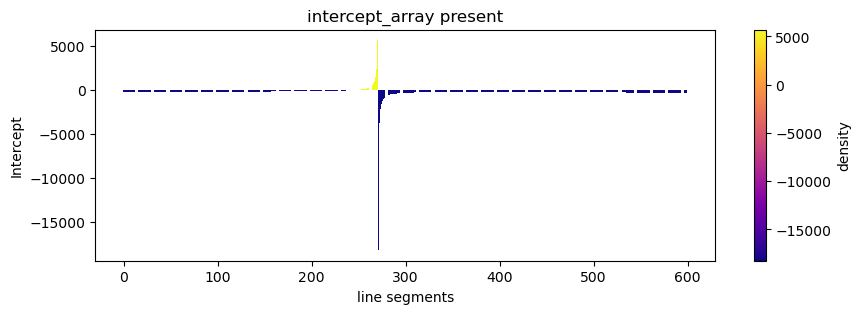

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 创建示例数据
data = intercept_array

# 计算颜色映射值
colors = cm.plasma(data)

# 绘制条形图，并根据颜色映射值设置颜色
plt.figure(figsize=(10, 3))
#plt.bar(range(len(data)), height=data, color=colors)
plt.bar(range(len(data)), height=data, color=colors)

plt.title('intercept_array present')
plt.xlabel('line segments')
plt.ylabel('Intercept')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap='plasma')
sm.set_array(data)
cbar = plt.colorbar(sm)
cbar.set_label('density')

plt.show()


### Kernel Density Estimation

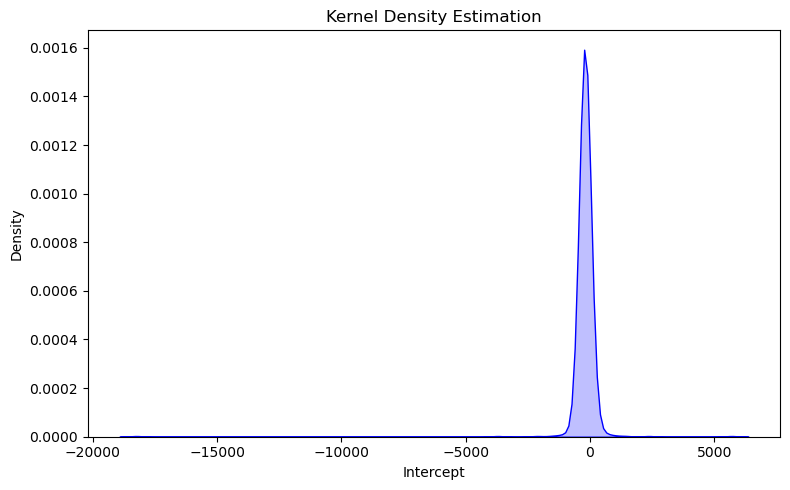

In [109]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 创建示例数据
data = intercept_array

# 绘制核密度估计图
plt.figure(figsize=(8, 5))
sns.kdeplot(data, color='blue', fill=True, common_norm=False)
plt.title('Kernel Density Estimation')
plt.xlabel('Intercept')
plt.ylabel('Density')
# 调整布局使其自适应
plt.tight_layout()

plt.show()


In [110]:
def find_maximal_interval(arr):
    arr.sort()  # sorting

    max_count = 0
    optimal_interval = []
    position = 0

    for i in range(round(arr[0]),round(arr[-1]-20)):
        current_interval = []
        for j in range(len(arr)):
            if (i + 20 > arr[j] and i < arr[j]):
                current_interval.append(arr[j])
                j = j + 1
        count = len(current_interval)

        if count > max_count:
            max_count = count
            optimal_interval = current_interval
            position = i


    print("the maximal interval: [", position, ",", position + 20, "] max count:", max_count)
    return optimal_interval
 
my_array = intercept_array
result = find_maximal_interval(my_array)
print("the maximal interval：", result)


the maximal interval: [ -213 , -193 ] max count: 146
the maximal interval： [-212.86596440808444, -212.81728076224638, -212.48479888592436, -212.1070580275815, -211.9071320765857, -211.73277811620062, -211.36199651416942, -211.0397111188916, -210.99475169557056, -210.63108327975723, -210.2710320660974, -210.2131880626173, -209.9146400699359, -209.5619505598263, -209.42583706192394, -209.21300809608485, -208.86785857072402, -208.67602898931196, -208.52654924882373, -208.18912881140315, -207.96222477388739, -207.85564739985855, -207.5261566620344, -207.28296928310232, -207.20070980000241, -206.8793616196216, -206.63688569693625, -206.56216858196177, -206.24918885667256, -206.02267032889347, -205.94048237738775, -205.63611089925732, -205.43908785295795, -205.33613805870647, -205.04062943552304, -204.884966899861, -204.74965261738458, -204.463277266939, -204.35919598975107, -204.18157519155957, -203.90462041590285, -203.86071977166347, -203.63248925740513, -203.38853554312774, -203.36526040

Line 300 - Endpoints: ((251.89970830693642, -162.93119722619133), (252.44141231337693, -162.09062791351909))



Line 300 - Midpoint: (-252.17056031015667, -162.5109125698552)
Line 300 - Endpoints: ((-252.44141231337693, -162.09062791351909), (-251.89970830693642, -162.93119722619133))
Line 300 - Slope: -1.551713302243349
Line 300 - intercept: -553.807325437284

References

https://en.wikipedia.org/wiki/Geometrical_optics

https://en.wikipedia.org/wiki/Reflection_(physics)

Moritz von Rohr, Geometrical Investigation of the Formation of Images in Optical Instruments, H.M.STATIONARY OFFICE, LONDON, 1920